LAB 1

In [14]:
# Import required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [15]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [17]:
# Features Selection
X = df.iloc[:, 1:-1] # slice the features
y = df.iloc[:, -1] # this is the labels (we don't need it)

In [18]:
print(X.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


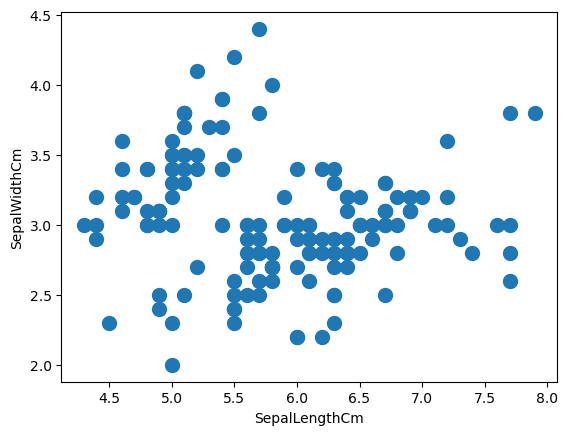

In [19]:
# Make a scatterplot using
# SepalLengthCm and SepalWidthCm
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

In [20]:
# Build a K-Means Model
# Based on visual inspection using scatterplot, 
# we can assumpt that the data has 2 cluster 
# (even though, from the label, there are 3 labels in this data) 

from sklearn.cluster import KMeans

# Initiate K-Means object with numbur of cluster is 2
cl_kmeans = KMeans(n_clusters=2)

# Fit and predict
y_kmeans = cl_kmeans.fit_predict(X)

c:\Users\Sherly\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


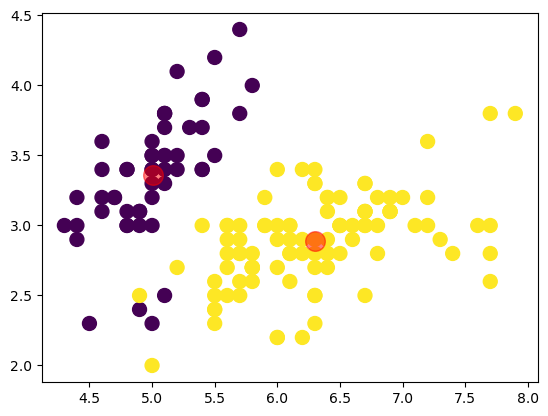

In [21]:
# Plot the clustering result
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot the centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [22]:
# Print SSE value
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733906


c:\Users\Sherly\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Sherly\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Sherly\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Sherly\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

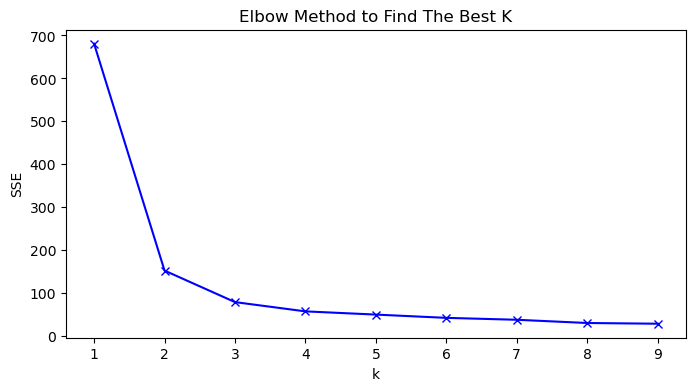

In [23]:
# Find the best k
# using Elbow Method

# List SSE values
sse = []

# Build k range from 1 to 9
K = range(1,10)

# Find the SSE value for each k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)

# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Elbow Method to Find The Best K")
plt.show()

LAB 2

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [25]:
# Build Synthetic Data
from sklearn.datasets import make_moons

X, y = make_moons(200, noise=.05, random_state=0)

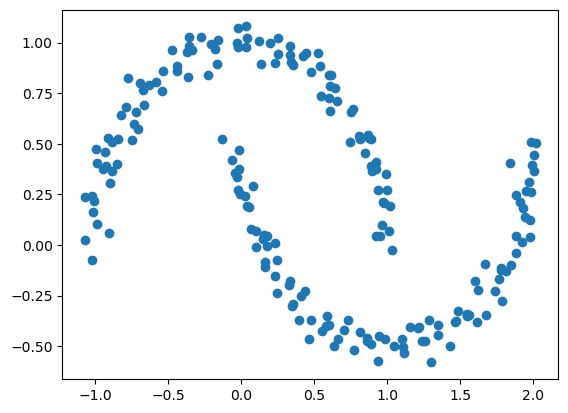

In [26]:
plt.scatter(X[:, 0], X[:, 1])

c:\Users\Sherly\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


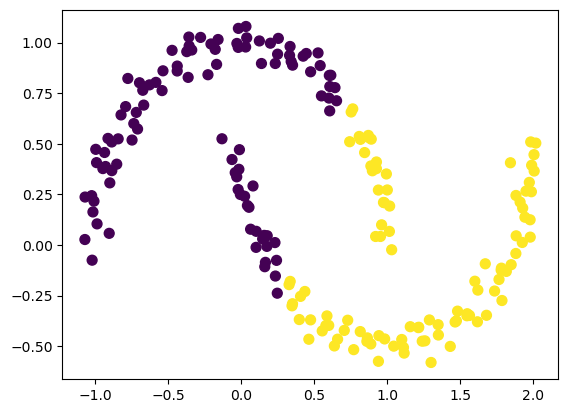

In [27]:
from sklearn.cluster import KMeans

kmeans = KMeans(2, random_state=0)
cluster = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=cluster, s=50, cmap='viridis')

In [28]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X, cluster))

0.49215648268306905


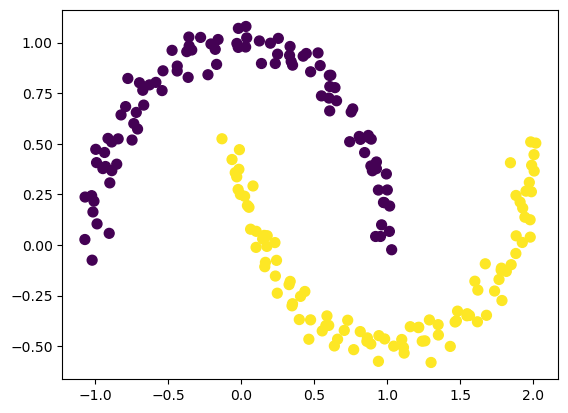

In [29]:
# Clustering using DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=2)
cluster_db = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=cluster_db, s=50, cmap='viridis')

In [30]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X, cluster_db))

0.32585318950197517


In [31]:
# Davies-Bouldin Index (DBI) → focuses on the separation index;
# the smaller the value, the better. Its range is from 0 to infinity.
from sklearn.metrics import davies_bouldin_score

# Compute and print Davies-Bouldin Index
db = davies_bouldin_score(X, cluster_db)

print(f"Davies-Bouldin Index: {db}")

Davies-Bouldin Index: 1.1622685374061352


LAB 3

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

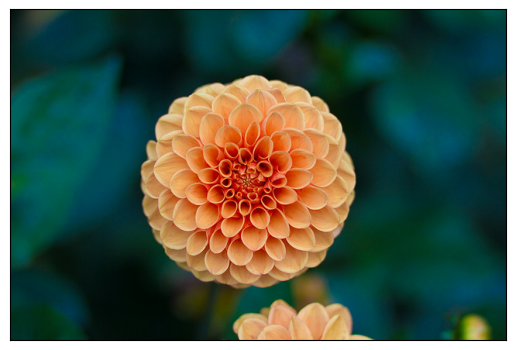

In [33]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower)

In [34]:
# Peprocessing
# Check shape
print(flower.shape)

# Normalize color
data = flower / 255.0

# Reshape
data = data.reshape(427 * 640, 3) # turn to 1D

print(data.shape)

(427, 640, 3)
(273280, 3)


In [35]:
# Check Color Distribution
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

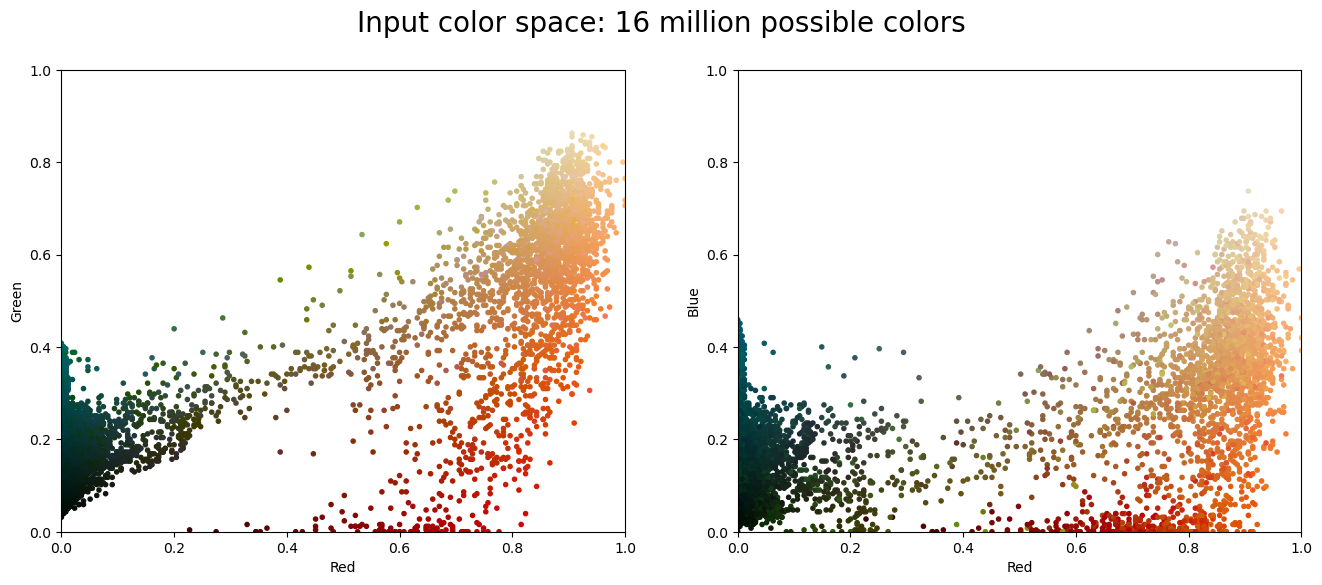

In [36]:
plot_pixels(data, title='Input color space: 16 million possible colors')

c:\Users\Sherly\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1955: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


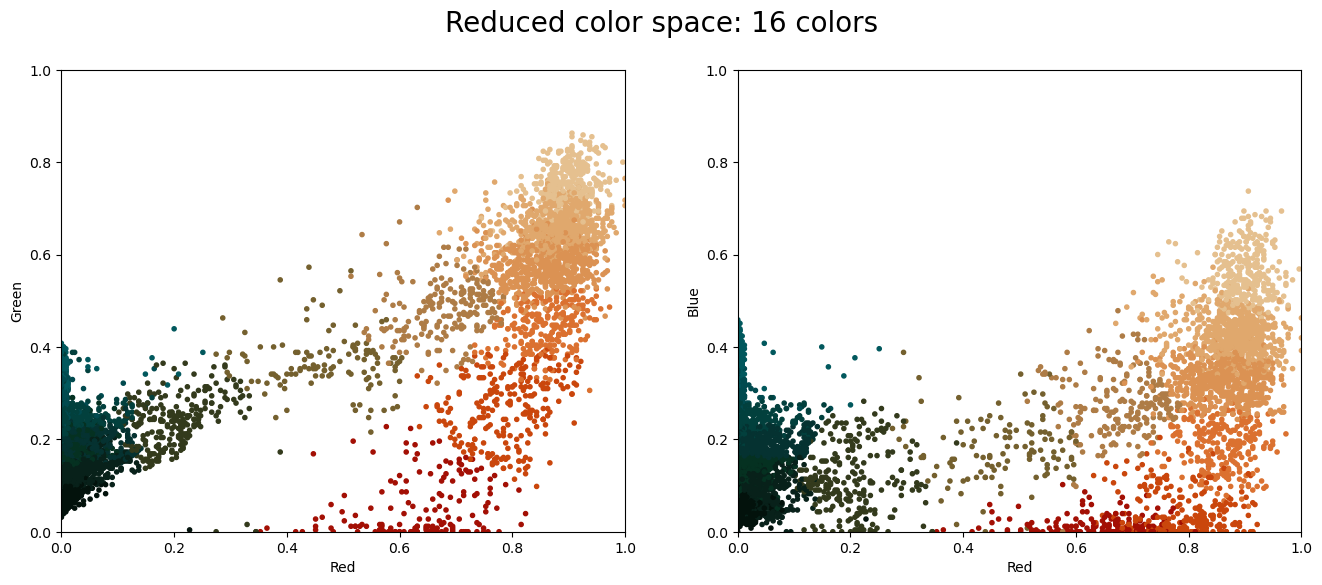

In [37]:
# Color Clustering Based on Similarity
# Reduce the image colors only to 16 colors
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

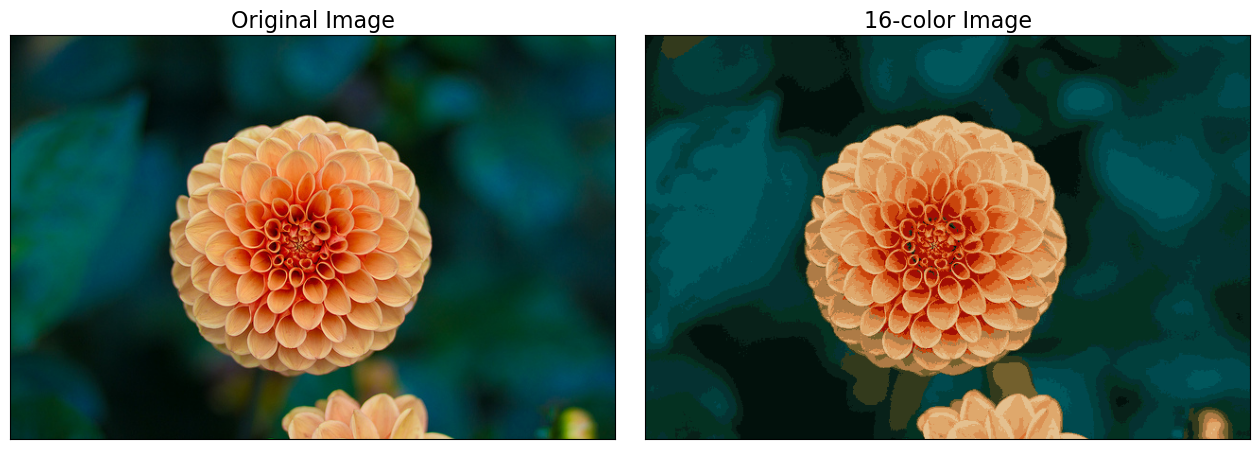

In [38]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

LAB ASSIGNMENT

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.neighbors import NearestNeighbors

In [53]:
df = pd.read_csv('CC_Customer_Dataset.csv')
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB



1. Create a scatter plot from the dataset using two variables, Avg_Credit_Limit and Total_Credit_Card. Determine whether the data distribution can be considered linear.

Pearson correlation = 0.6089
Linear regression R² = 0.3707


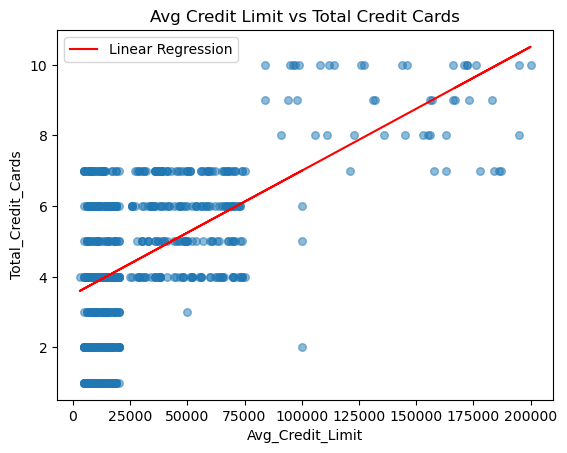

In [55]:
x_col = "Avg_Credit_Limit"
y_col = "Total_Credit_Cards"

plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title('Avg Credit Limit vs Total Credit Cards')
plt.scatter(df[x_col], df[y_col], s = 30, alpha=0.5)

# Correlation & Linear Regression
corr = df[x_col].corr(df[y_col])
lr = LinearRegression().fit(df[[x_col]], df[y_col])
r2 = lr.score(df[[x_col]], df[y_col])

# Fit regression line
plt.plot(df[x_col], lr.predict(df[[x_col]]), color='red', label='Linear Regression')
plt.legend()

print(f"Pearson correlation = {corr:.4f}")
print(f"Linear regression R² = {r2:.4f}")

The scatter plot shows a moderate positive correlation of approximately 0.37, indicating that while there is some relationship between higher credit limits and more credit cards, the distribution cannot be considered strongly linear due to the presence of distinct customer groupings and substantial variability in the data.

2. Build a clustering model using K-Means. Determine the optimal number of clusters (k) using the Elbow Method. Support your analysis with a line chart and an explanation of why you chose that value.

c:\Users\Sherly\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Sherly\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Sherly\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Sherly\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

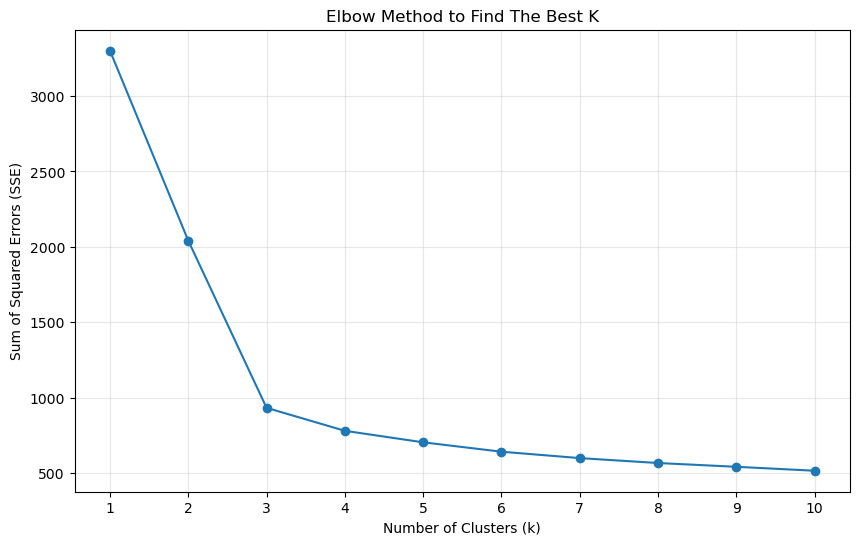

In [56]:
# Prepare data for clustering
X = df[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 
        'Total_visits_online', 'Total_calls_made']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method for K-Means
sse = [] 
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, 'o-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method to Find The Best K')
plt.xticks(k_range)
plt.grid(True, alpha=0.3)
plt.show()

The elbow method for K-Means clustering identified 3 as the optimal number of clusters, which indicates that this value of k provides the best balance between model complexity and clustering quality.

3. Visualize the clustering results from the K-Means model using a scatter plot.

c:\Users\Sherly\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


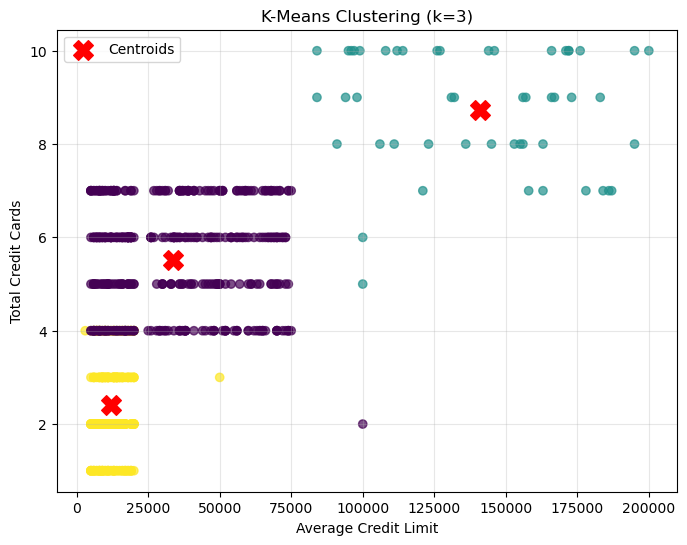

In [58]:
# Choose optimal k based on visual inspection of the elbow
optimal_k = 3

# Apply K-Means with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['KMeans_Cluster'] = kmeans_labels

# Visualize K-Means results
plt.figure(figsize=(8, 6))

plt.scatter(df['Avg_Credit_Limit'], df['Total_Credit_Cards'], 
            c=df['KMeans_Cluster'], cmap='viridis', alpha=0.7)

centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],
            c='red', marker='X', s=200, label='Centroids')
plt.legend()

plt.xlabel('Average Credit Limit')
plt.ylabel('Total Credit Cards')
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.grid(True, alpha=0.3)
plt.show()

The scatter plot of K-Means clustering results clearly shows distinct groups of customers, where each cluster is separated by color, confirming that the chosen k value effectively captures groupings in the dataset.

4. Build a clustering model using DBSCAN with all available variables.

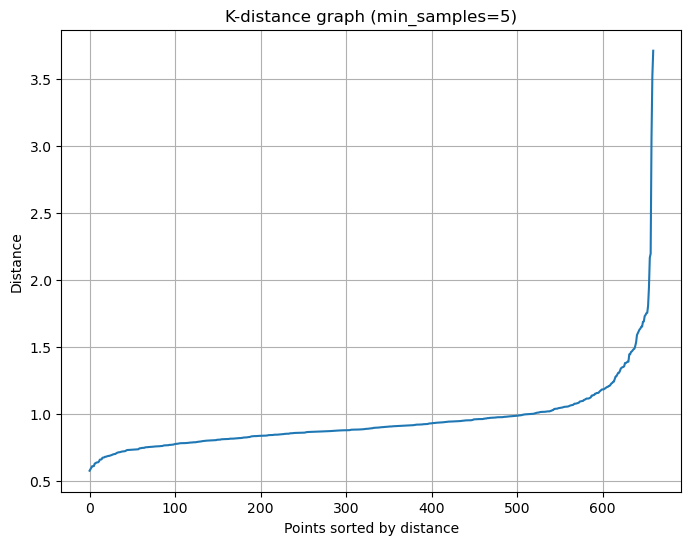

DBSCAN clustering result:
- eps = 1.1, min_samples = 5
- Number of clusters (excluding noise): 3
- Number of noise points: 49


In [46]:
num_df = df.select_dtypes(include=[np.number]).dropna()

scaler = StandardScaler()
X_all = scaler.fit_transform(num_df)

min_samples = 5
nbrs = NearestNeighbors(n_neighbors=min_samples).fit(X_all)
distances, _ = nbrs.kneighbors(X_all)
k_distances = np.sort(distances[:, -1])  # take farthest neighbor distance

plt.figure(figsize=(8,6))
plt.plot(k_distances)
plt.title("K-distance graph (min_samples=5)")
plt.xlabel("Points sorted by distance")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

eps = 1.1   # (choose from the k-distance curve)
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X_all)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"DBSCAN clustering result:")
print(f"- eps = {eps}, min_samples = {min_samples}")
print(f"- Number of clusters (excluding noise): {n_clusters}")
print(f"- Number of noise points: {n_noise}")

5. Determine the optimal number of clusters (k) using the Elbow Method. Support your analysis with a line chart and an explanation of why you chose that value.

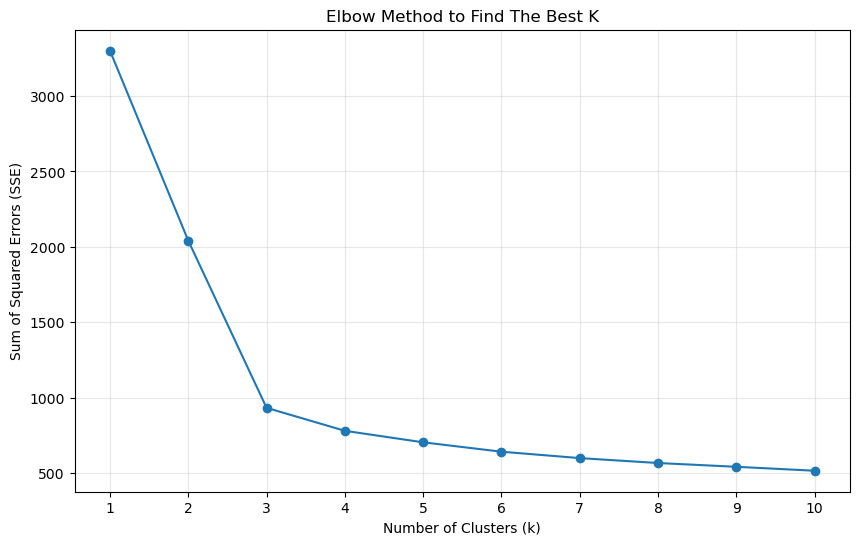

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, 'o-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method to Find The Best K')
plt.xticks(k_range)
plt.grid(True, alpha=0.3)
plt.show()

The elbow method identified k=3 as the optimal number of clusters, where the SSE curve exhibits a distinct elbow bend indicating that additional clusters beyond three would yield diminishing returns in variance reduction while unnecessarily increasing model complexity.

6. Calculate the silhouette score and Davies–Bouldin Index (DBI) for the DBSCAN model.

In [61]:
if n_clusters > 1:
    silhouette = silhouette_score(X_all, labels)
    dbi = davies_bouldin_score(X_all, labels)
    print("Silhouette Score:", silhouette)
    print("Davies-Bouldin Index:", dbi)
else:
    print("DBSCAN detected only one cluster or noise. Cannot compute silhouette/DBI.")

Silhouette Score: 0.46201461538460836
Davies-Bouldin Index: 1.2080413659018998
